In [1]:
%run  tools/train.py  --finetune-from ./model_final.pth --model bisenetv2

False
./datasets/signate,./datasets/signate/signate_train.txt,8
in get_data_loader
defined DL
prepared for train


KeyboardInterrupt: 

In [23]:
path = "./train.txt"
with open(path, mode='w') as f:
    for i in range(0,2243):
        f.write("seg_train_images/train_{}.jpg,seg_train_annotations/train_{}.png\n".format(str(i).zfill(4), str(i).zfill(4)))

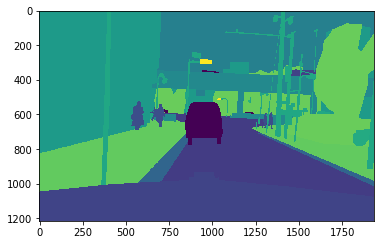

In [36]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("./datasets/signate/seg_train_annotations/train_0000.png",0)
plt.imshow(img)